 ### EDA (Exploratory Data Analysis) 

In [ ]:
# Instalar kagglehub
!pip install kagglehub
import kagglehub #Importar kagglehub
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows") #Descargar dataset desde Kaggle
print("Path to dataset files:", path) #Imprimir la ruta del dataset
import os  #Importar la librería os para manejar archivos
dataset_path = r"C:\Users\57322\.cache\kagglehub\datasets\harshitshankhdhar\imdb-dataset-of-top-1000-movies-and-tv-shows\versions\1" # Ruta donde se descargó el dataset
files = os.listdir(dataset_path) # Listar archivos en la carpeta

#Imprimir los nombres de los archivos
print("Archivos en la carpeta del dataset:") 
for file in files:
    print(file)
#Importar pandas para manipulación de datos   
import pandas as pd

# Especificar la ruta completa al archivo CSV
file_path = r"C:\Users\57322\.cache\kagglehub\datasets\harshitshankhdhar\imdb-dataset-of-top-1000-movies-and-tv-shows\versions\1\imdb_top_1000.csv"

# Cargar el dataset
df = pd.read_csv(file_path)
# Ver las primeras filas del dataframe
print(df.head())

#### Inspección de los datos

In [2]:
# Ver los nombres de las columnas: 
print(df.columns)

#Poster_Link: Enlace al póster que utiliza IMDb
#Series_Title: Nombre de la película
#Released_Year: Año en que se estrenó la película
#Certificate: Certificado o clasificación de la película
#Runtime: Duración total de la película
#Genre: Género de la película
#IMDB_Rating: Calificación de la película en IMDb
#Overview: Resumen o sinopsis de la película
#Meta_score: Puntuación obtenida por la película 
#Director: Nombre del director
#Star1, Star2, Star3, Star4: Nombres de los actores principales
#No_of_votes: Número total de votos recibidos por la película
#Gross: Dinero recaudado por la película

# Verificar los tipos de datos
print(df.dtypes)

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


#### Estadísticas descriptivas

##### Para variables numéricas

In [3]:

# Crear un DataFrame vacío para almacenar estadísticas numéricas
num_stats_df = pd.DataFrame()

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    num_stats_df[col] = [
        df[col].count(),                     # Conteo
        df[col].mean(),                      # Media
        df[col].std(),                       # Desviación Estándar
        df[col].min(),                       # Mínimo
        df[col].quantile(0.25),              # 25%
        df[col].median(),                    # Mediana
        df[col].quantile(0.75),              # 75%
        df[col].max(),                       # Máximo
        df[col].mode()[0],                  # Moda
        (df[col].std() / df[col].mean()) * 100,  # Coeficiente de Variación
        df[col].skew(),                      # Asimetría
        df[col].kurt()                       # Curtosis
    ]

# Asignar nombres a las filas
num_stats_df.index = [
    'Count', 'Mean', 'Standard Deviation', 'Minimum', 
    '25%', 'Median', '75%', 'Maximum', 
    'Mode', 'Coefficient of Variation (%)', 
    'Skewness', 'Kurtosis'
]

# Mostrar estadísticas numéricas
print("Estadísticas Descriptivas de Variables Numéricas:")
print(num_stats_df)


Estadísticas Descriptivas de Variables Numéricas:
                              IMDB_Rating  Meta_score   No_of_Votes
Count                         1000.000000  843.000000  1.000000e+03
Mean                             7.949300   77.971530  2.736929e+05
Standard Deviation               0.275491   12.376099  3.273727e+05
Minimum                          7.600000   28.000000  2.508800e+04
25%                              7.700000   70.000000  5.552625e+04
Median                           7.900000   79.000000  1.385485e+05
75%                              8.100000   87.000000  3.741612e+05
Maximum                          9.300000  100.000000  2.343110e+06
Mode                             7.700000   76.000000  6.534100e+04
Coefficient of Variation (%)     3.465603   15.872587  1.196131e+02
Skewness                         1.016964   -0.605225  2.300011e+00
Kurtosis                         1.432727    0.420831  6.895099e+00


##### IMBD

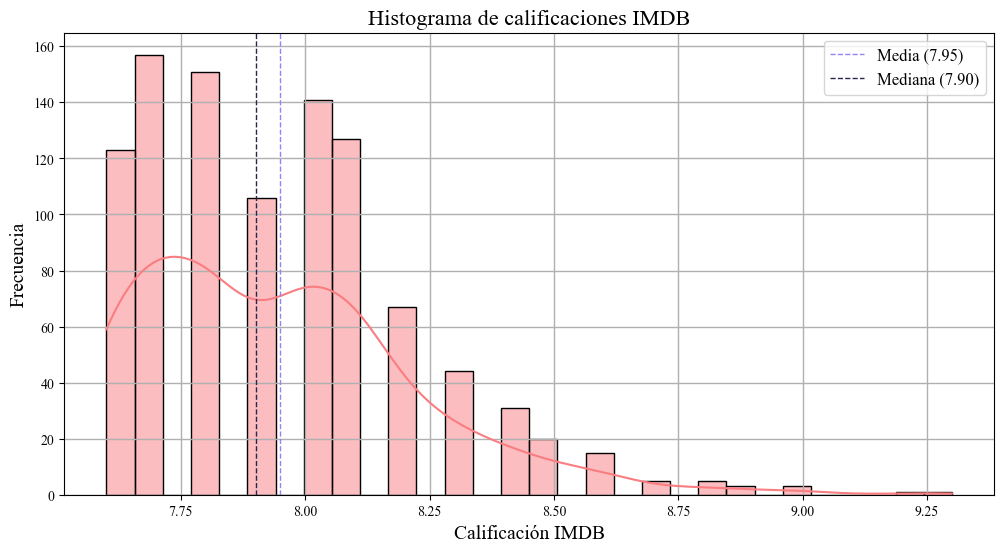

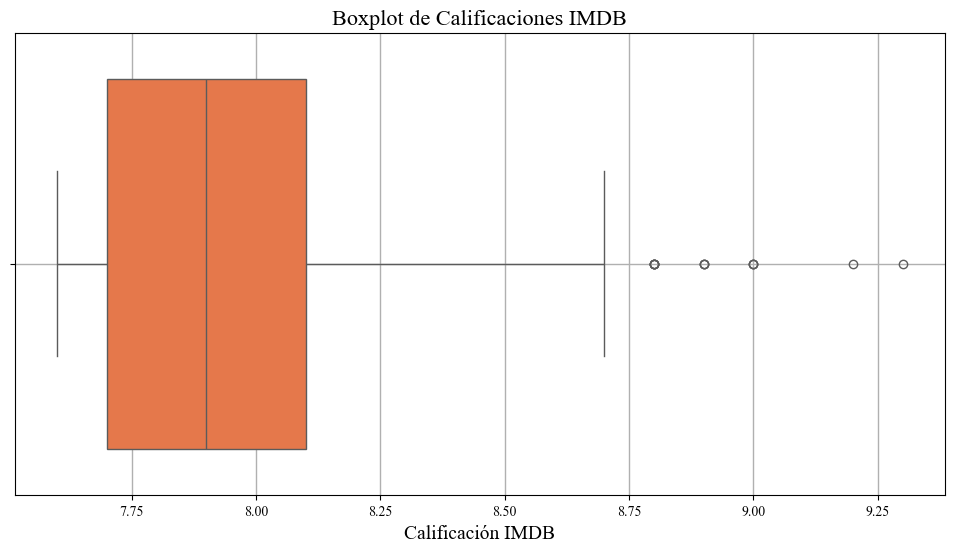

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la fuente Times New Roman
plt.rc('font', family='Times New Roman')

# 1. Histograma 
plt.figure(figsize=(12, 6))
sns.histplot(df['IMDB_Rating'], bins=30, kde=True, color='#F97D81')  
plt.title('Histograma de calificaciones IMDB', fontsize=16)
plt.xlabel('Calificación IMDB', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Líneas para media y mediana
plt.axvline(df['IMDB_Rating'].mean(), color='#9881F5', linestyle='--', linewidth=1.0, label=f'Media ({df["IMDB_Rating"].mean():.2f})')  
plt.axvline(df['IMDB_Rating'].median(), color='#29264E', linestyle='--', linewidth=1.0, label=f'Mediana ({df["IMDB_Rating"].median():.2f})') 

plt.legend(fontsize=12)
plt.grid(linewidth=1.0)
plt.show()

# 2. Boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['IMDB_Rating'], color='#FF6D31', linewidth=1.0)  
plt.title('Boxplot de Calificaciones IMDB', fontsize=16)
plt.xlabel('Calificación IMDB', fontsize=14)
plt.grid(linewidth=1.0)
plt.show()


Para IMDB_Rating, se tienen 1000 observaciones de calificaciones IMDB. La calificación promedio es de 7.95: En promedio, las películas en el conjunto de datos son bien valoradas. Con una desviación estándar de 0.28, las calificaciones tienden a estar relativamente cerca de la media, lo que sugiere que no hay presencia de variabilidad alta en las calificaciones. 
Bajo esta misma línea, se observa que la calificación más baja es 7.6, lo que indica que las calificaciones son generalmente altas. Esto se refuerza al tener en cuenta que la calificación más alta es 9.3, y la calificación más frecuente es 7.7
Asímismo, el 25% de las calificaciones están por debajo de 7.7. La mediana es 7.9, así que la mitad de las calificaciones son superiores a este valor. Y el 75% de las calificaciones son inferiores a 8.1.
Un coeficiente de variación del 3.47% demuestra que la variación es baja en relación con la media. También hay una asimetría positiva, lo que sugiere que hay más películas con calificaciones superiores a la media que inferiores.
Y por último, un valor de 1.43 indica que la distribución es relativamente plana. Es decir, que hay menos extremos que en una distribución normal.

En Meta_score, existen 843 observaciones de calificaciones de Meta Score. La calificación promedio es de 77.97, lo que sugiere que, en general, las películas reciben una crítica favorable. El 25% de las calificaciones están por debajo de 70. La mediana es 79, por consecuente la mitad de las calificaciones son superiores a este valor, el 75% de las calificaciones son inferiores a 87, y la calificación más alta es 100. Con una desviación estándar de 12.38, hay una variabilidad moderada en las calificaciones. La calificación más frecuente es 76, lo que sugiere que muchas películas tienen una calificación alrededor de este valor.
Un coeficiente de variación del 15.87% indica una variación moderada en relación con la media. Con un valor de -0.61, hay una asimetría negativa, lo que comprueba que hay más películas con calificaciones inferiores a la media. El valor de 0.42 de kutorsis sugiere que la distribución es relativamente plana, con menos extremos que en una distribución normal.

 Con respecto a No_of_Votes, hay 1000 observaciones sobre el número de votos. El número promedio de votos es 273,692.
 Con una desviación estándar de 327,372.7, hay una alta variabilidad en el número de votos,por lo tanto, algunas películas tienen un número significativamente mayor de votos que otras.
El número mínimo de votos es 25,088 y el 25% de las películas tienen menos de 55,526 votos. La mediana es 138,548, lo que indica que la mitad de las películas tienen más de este número de votos y el 75% de las películas tienen menos de 374,161 votos, la película con el mayor número de votos tiene 2,343,110, y se añade que la cantidad más frecuente de votos es 65,341, indicando que este es un número común entre las películas.
Un coeficiente de variación del 119.61% demuestra una gran variabilidad en relación con la media. Con 2.3, hay una fuerte asimetría positiva, lo que sugiere que hay muchas películas con un número bajo de votos en comparación con un pequeño número de películas muy populares.La kurtosis de 6.90 indica que la distribución tiene colas más pesadas que una distribución normal, sugiriendo la presencia de muchos valores extremos.

##### Para variables categóricas

In [5]:
# Crear un DataFrame vacío para almacenar estadísticas categóricas
cat_stats_df = pd.DataFrame()

for col in df.select_dtypes(include=['object']).columns:
    cat_stats_df[col] = [
        df[col].count(),                    # Conteo
        df[col].nunique(),                  # Valores Únicos
        df[col].mode()[0],                 # Moda
        df[col].value_counts().max()        # Conteo de la Moda
    ]

# Asignar nombres a las filas
cat_stats_df.index = [
    'Count', 'Unique Values', 'Mode', 'Count of Mode'
]

# Mostrar estadísticas categóricas
print("Estadísticas Descriptivas de Variables Categóricas:")
print(cat_stats_df)


Estadísticas Descriptivas de Variables Categóricas:
                                                     Poster_Link Series_Title  \
Count                                                       1000         1000   
Unique Values                                               1000          999   
Mode           https://m.media-amazon.com/images/M/MV5BM2EzZm...     Drishyam   
Count of Mode                                                  1            2   

              Released_Year Certificate  Runtime  Genre  \
Count                  1000         899     1000   1000   
Unique Values           100          16      140    202   
Mode                   2014           U  100 min  Drama   
Count of Mode            32         234       23     85   

                                                        Overview  \
Count                                                       1000   
Unique Values                                               1000   
Mode           "Documentary" about a man w


Para el link de los posters, se encuentran 1000 valores únicos, lo que indica que cada película tiene un cartel distinto. Al ser cada enlace único, no hay ningún póster repetido.
 En los títulos de las películas, hay 999 valores únicos para 1000 observaciones, lo que significa que hay una película que aparece dos veces en la lista. Se denota que es "Drishyam"
 Con respecto al año de lanzamiento de las películas, hay 100 valores únicos.  La moda es 2014, con 32 películas publicadas.

 La clasificación por edades de la película (, PG-13, R, etc.) contiene 16 valores únicos de clasificación. El más usado es "U", con 234 películas clasificadas como aptas para todo público.
 En la duración de la película en minutos, se conocen 140 duraciones particulares. La más usual es 100 minutos, con 23 películas de esa duración.
 Dentro del conjunto de datos, existen 202 géneros únicos. El más usado es el Drama, con 85 películas en ese género.
 Para las sipnosis, se obtienen 1000 valores únicos, lo que significa que cada sinopsis es distinta.
 

 Se observan 548 directores únicos en el conjunto de datos. El director más frecuente es Alfred Hitchcock, con 14 películas.
 De la misma forma, hay 660 actores principales únicos, siendo el Tom Hanks el más repetido, con 12 películas, lo que indica que es el actor principal más frecuente.
 Para el segundo actor o actriz en la película, se exploran tiene 841 valores que no se repiten, siendo la más usada Emma Watson, con 7 películas.
 Para el tercero se demuestran 891 valores únicos, con la moda siendo Rupert Grint en 5 películas.
 Y para el cuarto, se tienen 939 valores únicos, con el más repetido siendo Michael Caine, participando en 4 películas.
 Se  concluye con la existencia de 823 valores únicos de ganancias netas. El valor más usual es de  4,360,000, con 5 películas que generaron esta cantidad de ingresos brutos.

#### ¿Qué géneros tienden a generar más ingresos?

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\57322\AppData\Local\Temp\ipykernel_4872\438391182.py:4: SyntaxWarning: invalid escape sequence '\$'
  df_clean['Gross'] = df_clean['Gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\57322\AppData\Local\Temp\ipykernel_4872\438391182.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gross', y='Genre', data=genre_gross_mean, palette="coolwarm")


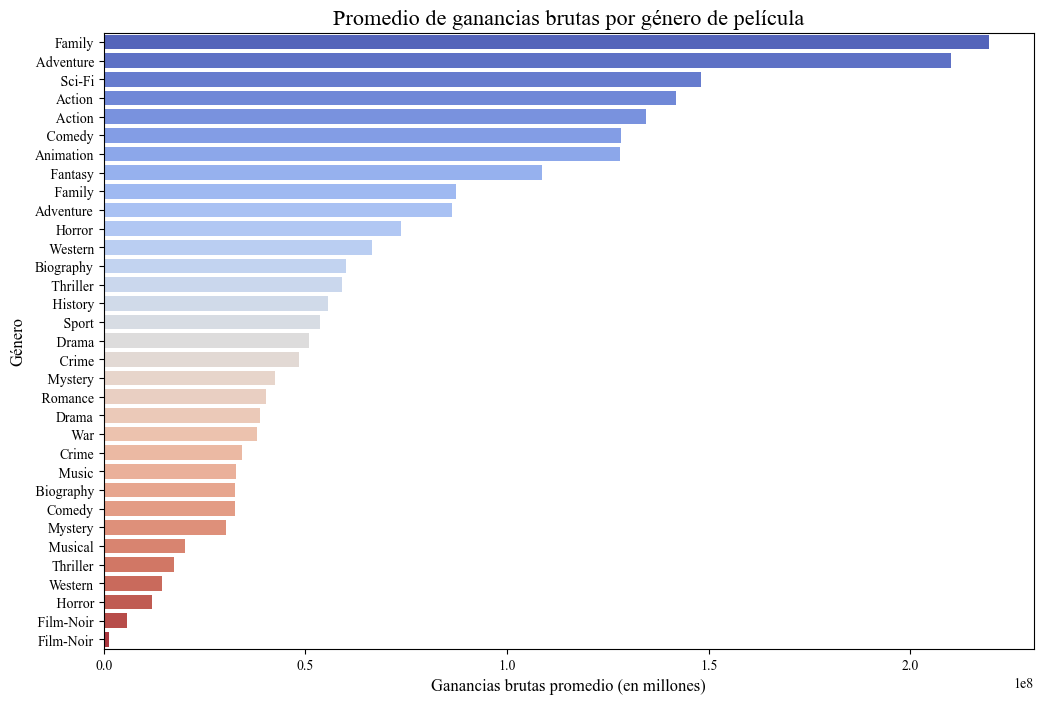

In [6]:
# Eliminar filas con valores nulos en las columnas 'Genre' y 'Gross'
df_clean = df[['Genre', 'Gross']].dropna()
# Convertir la columna 'Gross' a formato numérico (si es necesario eliminar comas o caracteres)
df_clean['Gross'] = df_clean['Gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# Separar múltiples géneros en filas distintas para facilitar el análisis
df_clean = df_clean.assign(Genre=df_clean['Genre'].str.split(',')).explode('Genre').reset_index(drop=True)
# Calcular las ganancias promedio por género
genre_gross_mean = df_clean.groupby('Genre')['Gross'].mean().reset_index()
# Ordenar los géneros por ganancias promedio
genre_gross_mean = genre_gross_mean.sort_values(by='Gross', ascending=False)
# Crear la gráfica para visualizar la relación entre géneros y ganancias promedio
plt.figure(figsize=(12, 8))
sns.barplot(x='Gross', y='Genre', data=genre_gross_mean, palette="coolwarm")
# Añadir títulos y etiquetas
plt.title('Promedio de ganancias brutas por género de película', fontsize=16)
plt.xlabel('Ganancias brutas promedio (en millones)', fontsize=12)
plt.ylabel('Género', fontsize=12)
# Mostrar la gráfica
plt.show()

#### Impacto de actores famosos en las calificaciones

C:\Users\57322\AppData\Local\Temp\ipykernel_4872\3626371875.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  actor_ratings = pd.concat([actor_ratings, temp_df])


                  Actor  Total_Ratings
2135     Robert De Niro          138.0
2498          Tom Hanks          112.5
35            Al Pacino          105.0
295           Brad Pitt           96.2
471      Clint Eastwood           95.5
1511  Leonardo DiCaprio           89.4
438      Christian Bale           88.5
1696         Matt Damon           88.1
1069      James Stewart           81.4
1748      Michael Caine           72.7


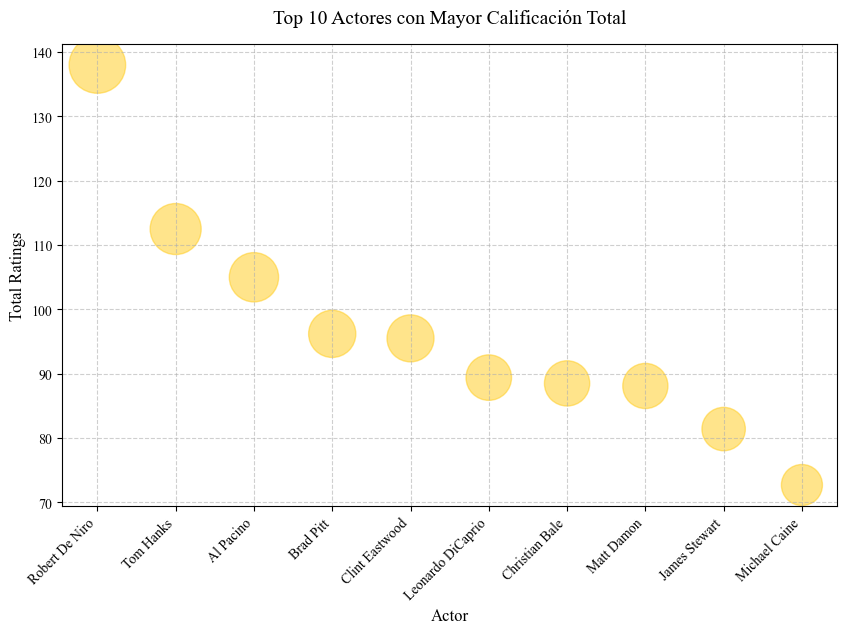

In [7]:
actor_columns = ['Star1', 'Star2', 'Star3', 'Star4']
rating_column = 'IMDB_Rating'
# Creamos un DataFrame vacío para almacenar los resultados
actor_ratings = pd.DataFrame(columns=['Actor', 'Total_Ratings'])
# Iteramos sobre las columnas de actores
for actor in actor_columns:
    # Agrupamos por el actor y sumamos las calificaciones
    temp_df = df.groupby(actor)[rating_column].sum().reset_index()
    temp_df.columns = ['Actor', 'Total_Ratings']
    actor_ratings = pd.concat([actor_ratings, temp_df])
# Agrupamos por actor y sumamos las calificaciones
actor_ratings = actor_ratings.groupby('Actor', as_index=False).sum()
# Ordenamos y seleccionamos los diez actores con más calificaciones
top_actors = actor_ratings.sort_values(by='Total_Ratings', ascending=False).head(10)

# Mostramos el resultado
print(top_actors)

import matplotlib.pyplot as plt

# Ajustar el tamaño de las burbujas 
bubble_size = top_actors['Total_Ratings'] * 12

# Crear el gráfico de burbujas
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con tamaño de burbuja ajustado
plt.scatter(top_actors['Actor'], top_actors['Total_Ratings'], s=bubble_size, alpha=0.5, color='#FFCB18')

# Añadir etiquetas y título
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.title('Top 10 Actores con Mayor Calificación Total', fontsize=14, pad=15)

# Rotar etiquetas de actores para mejor visibilidad
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()


#### Parejas con mejor calificación promedio

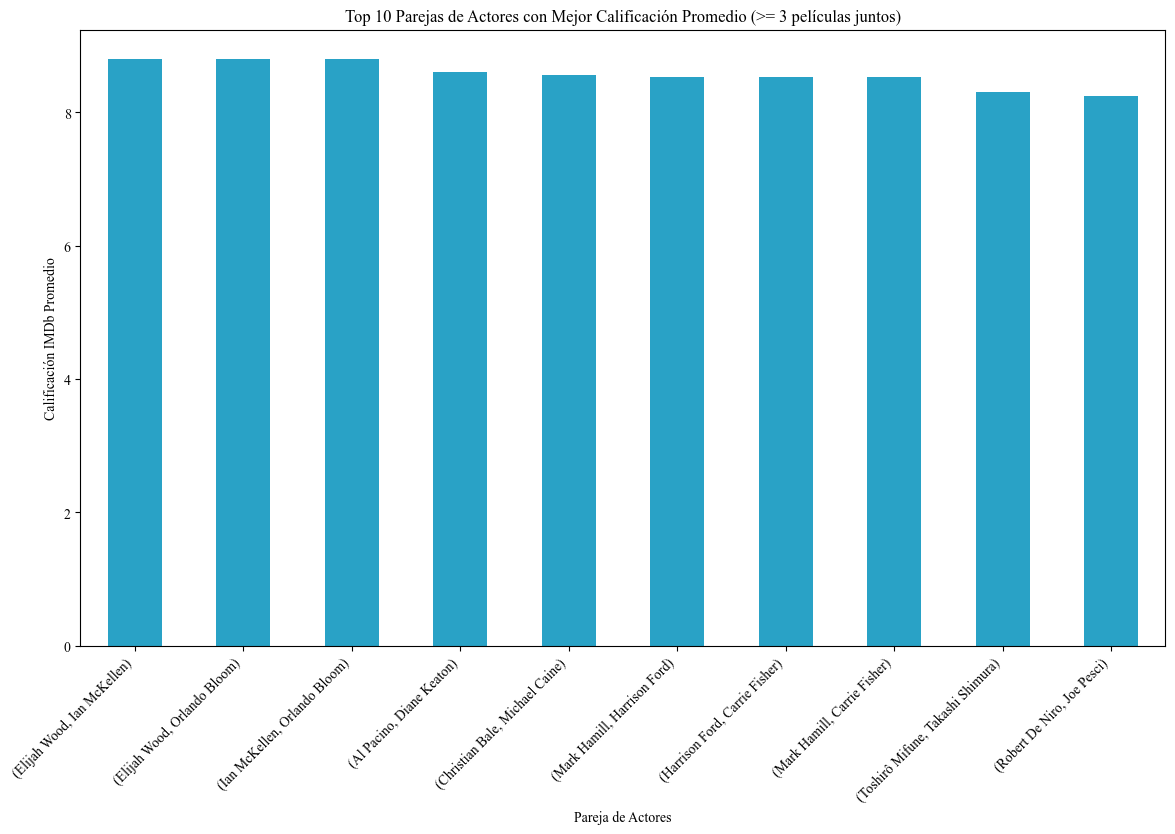

In [8]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Crear una lista para almacenar pares de actores y su calificación IMDb
pairs_list = []

# Iterar por cada fila en el DataFrame
for _, row in df.iterrows():
    # Obtener combinaciones de los cuatro actores de cada película
    actors = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]
    for pair in combinations(actors, 2):  # Crear pares únicos
        pairs_list.append((pair, row['IMDB_Rating']))

# Convertir la lista en un DataFrame
pairs_df = pd.DataFrame(pairs_list, columns=['Actor_Pair', 'IMDB_Rating'])

# Agrupar por pareja de actores para calcular el número de apariciones y la calificación promedio
pairs_stats = pairs_df.groupby('Actor_Pair').agg({'IMDB_Rating': ['mean', 'count']})
pairs_stats.columns = ['Mean_Rating', 'Pair_Count']

# Filtrar las parejas que han trabajado juntas en al menos 3 películas
top_pairs = pairs_stats[pairs_stats['Pair_Count'] >= 3].sort_values('Mean_Rating', ascending=False).head(10)

# Visualización
# Configuración de la fuente Times New Roman
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(14, 8))
top_pairs['Mean_Rating'].plot(kind='bar', color='#29A2C6')
plt.title('Top 10 Parejas de Actores con Mejor Calificación Promedio (>= 3 películas juntos)')
plt.xlabel('Pareja de Actores')
plt.ylabel('Calificación IMDb Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Colaboración de actor y director

                 Director                Actor  Count
0              Aamir Khan           Aamir Khan      1
4            Aaron Sorkin           Alex Sharp      1
8     Abdellatif Kechiche  Adèle Exarchopoulos      1
12       Abhishek Chaubey           Alia Bhatt      1
16        Abhishek Kapoor            Amit Sadh      1
...                   ...                  ...    ...
3703          Zack Snyder         Carla Gugino      1
3711       Zaza Urushadze         Elmo Nüganen      1
3715          Zoya Akhtar           Abhay Deol      1
3723          Çagan Irmak           Ege Tanman      1
3727     Ömer Faruk Sorak           Cem Yilmaz      1

[548 rows x 3 columns]


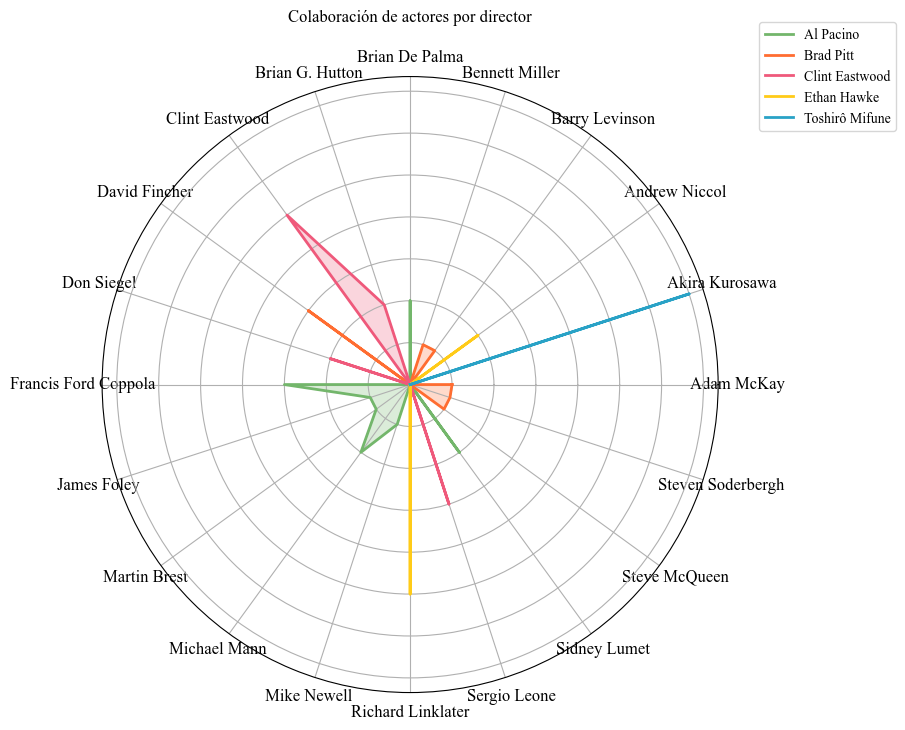

In [10]:

# Crear un DataFrame vacío para almacenar las relaciones director-actor
director_actor = []

# Iterar por cada fila en el DataFrame
for _, row in df.iterrows():
    director = row['Director']  # Asegúrate de que este nombre es correcto
    # Crear una lista de actores
    actors = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]
    for actor in actors:
        if pd.notna(actor):  # Asegúrate de que el actor no sea NaN
            director_actor.append((director, actor))

# Crear un DataFrame con las relaciones director-actor
director_actor_df = pd.DataFrame(director_actor, columns=['Director', 'Actor'])
# Contar la cantidad de veces que cada actor ha trabajado con cada director
actor_counts = director_actor_df.groupby(['Director', 'Actor']).size().reset_index(name='Count')
# Encontrar el actor más usado por cada director
most_used_actor = actor_counts.loc[actor_counts.groupby('Director')['Count'].idxmax()]
# Mostrar los resultados
print(most_used_actor)
top_actors = most_used_actor.groupby('Actor')['Count'].sum().nlargest(5).index

# Filtrar el DataFrame para que contenga solo estos actores
top_actors_data = most_used_actor[most_used_actor['Actor'].isin(top_actors)]
pivot_data = top_actors_data.pivot(index='Actor', columns='Director', values='Count').fillna(0)


# Crear el gráfico de radar
num_vars = len(pivot_data.columns)
import numpy as np
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Repetir el primer valor para cerrar el círculo
values = pivot_data.loc[pivot_data.index[0]].tolist()
values += values[:1]
angles += angles[:1]
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
# Definir colores
colors = ['#73B66B', '#FF6D31', '#EF597B', '#FFCB18', '#29A2C6']
# Dibujar una línea por cada actor con colores personalizados
for i in range(len(pivot_data)):
    values = pivot_data.iloc[i].tolist()
    values += values[:1]  # cerrar el círculo
    ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])  # Asignar color
    ax.plot(angles, values, linewidth=2, label=pivot_data.index[i], color=colors[i % len(colors)])  # Asignar color

# Ajustar las etiquetas y el título
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(pivot_data.columns, fontsize=12)
plt.title('Colaboración de actores por director', fontsize=12, pad=20)

# Ajustar la leyenda
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


#### Top 10 actores más apreciados por la crítica

In [36]:
# Filtrar los directores y sus puntuaciones de Meta
top_10_directors_meta = df.groupby('Director')['Meta_score'].mean().sort_values(ascending=False).head(10)

# Mostrar los 10 directores más apreciados por las críticas (según Meta_score)
top_10_directors_meta


Director
Orson Welles            99.5
Charles Laughton        99.0
Michael Curtiz          98.5
Joseph L. Mankiewicz    98.0
Guillermo del Toro      98.0
Fritz Lang              98.0
Cristian Mungiu         97.0
Sergei M. Eisenstein    97.0
Sam Peckinpah           97.0
Jules Dassin            97.0
Name: Meta_score, dtype: float64

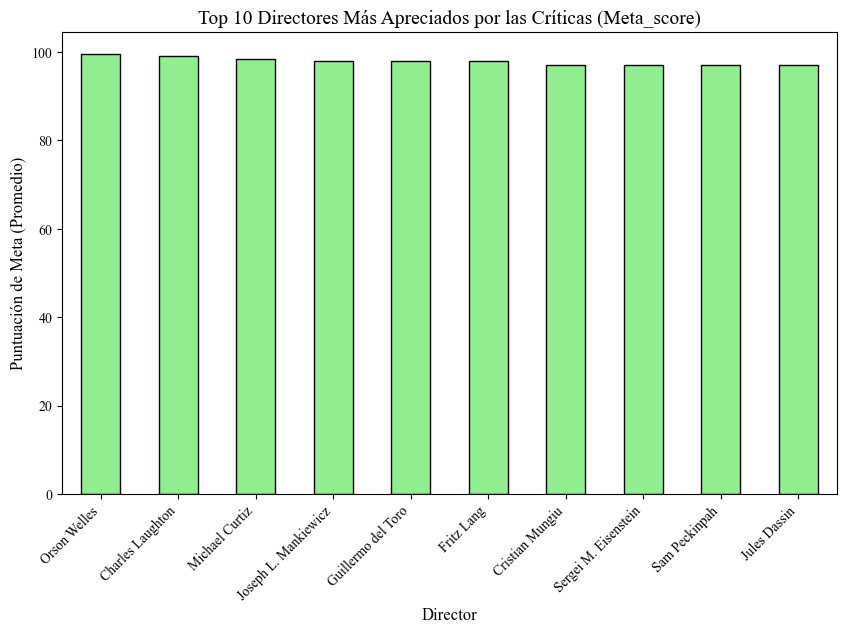

In [38]:
# Crear un gráfico de barras verticales
plt.figure(figsize=(10, 6))
top_10_directors_meta.plot(kind='bar', color='lightgreen', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Top 10 Directores Más Apreciados por las Críticas (Meta_score)', fontsize=14)
plt.ylabel('Puntuación de Meta (Promedio)', fontsize=12)
plt.xlabel('Director', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45, ha="right")  # Rotar los nombres de los directores para mejor visibilidad
plt.show()
